In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#개인이 갖고 있는 파일 불러와주세요!
amazon = pd.read_csv('./AmazonFoodCategory Dataset.csv')

# 데이터 결측치, 제거 

In [3]:
amazon1 = amazon[amazon['Discount Amount'] >=0]
amazon1 = amazon1[amazon1['Sales Price'] > 0]
amazon1 = amazon1[amazon1['Sales Quantity'] > 0]
amazon1.drop(['Line Number','Sales Rep','Invoice Date', 'Order Number','Item Number', 'Item Class', 'Promised Delivery Date'], axis = 1, inplace = True)
amazon1 = amazon1[amazon1['Sales Cost Amount'] > 0]
amazon1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64223 entries, 0 to 65279
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Custkey                           64223 non-null  int64  
 1   DateKey                           64223 non-null  object 
 2   Discount Amount                   64223 non-null  float64
 3   Invoice Number                    64223 non-null  int64  
 4   Item                              64223 non-null  object 
 5   List Price                        64223 non-null  float64
 6   Sales Amount                      64223 non-null  float64
 7   Sales Amount Based on List Price  64223 non-null  float64
 8   Sales Cost Amount                 64223 non-null  float64
 9   Sales Margin Amount               64223 non-null  float64
 10  Sales Price                       64223 non-null  float64
 11  Sales Quantity                    64223 non-null  int64  
 12  U/M      

# 데이터 타입 변경

In [4]:
amazon1['Custkey'] = amazon1['Custkey'].astype(object)
amazon1['Invoice Number'] = amazon1['Invoice Number'].astype(object)
amazon1['DateKey'] = pd.to_datetime(amazon1['DateKey'])

In [5]:
amazon1.reset_index(drop=True)

,Custkey,DateKey,Discount Amount,Invoice Number,Item,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,U/M
0,10016609,2019-12-31,398.7300,329568,Super Vegetable Oil,163.4700,418.62,817.3500,102.99,315.63,83.72400,5,EA
1,10016609,2019-12-31,268.6700,329569,Golden Fajita French Fries,275.3700,282.07,550.7400,117.45,164.62,141.03500,2,EA
2,10016609,2019-12-31,398.7300,329569,Super Vegetable Oil,163.4700,418.62,817.3500,102.99,315.63,83.72400,5,EA
3,10016609,2019-12-31,466.4500,329569,High Top Oranges,119.5200,489.71,956.1600,213.29,276.42,61.21375,8,EA
4,10016609,2019-12-31,515.5100,329569,Tell Tale New Potatos,264.1800,541.21,1056.7200,290.56,250.65,135.30250,4,EA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64218,10025919,2017-01-01,466.3700,119182,Best Choice Graham Crackers,1029.9800,563.61,1029.9800,312.93,250.68,563.61000,1,EA
64219,10009985,2017-01-01,783.9700,119186,Red Spade Foot-Long Hot Dogs,1627.8400,843.87,1627.8400,475.75,368.12,843.87000,1,EA
64220,10025552,2017-01-01,1309.5297,119192,Atomic Mint Chocolate Bar,1254.1899,2453.04,3762.5697,1032.83,1420.21,817.68000,3,EA
64221,10025025,2017-01-01,222.6500,119197,Just Right Canned Tuna in Water,491.7200,269.07,491.7200,159.14,109.93,269.07000,1,EA


## 파생변수 만들기 

In [6]:
amazon1['Discount Rate'] = ((amazon1['Sales Amount Based on List Price'] - amazon1['Sales Amount'])/amazon1['Sales Amount Based on List Price'] * 100).round(2)

In [7]:
amazon1['Discount Rate'].value_counts().sort_index(ascending=False)

Discount Rate
76.48       6
75.50       6
74.79       1
73.73       1
72.68       1
         ... 
2.15        7
2.00        2
1.00        6
0.06        3
0.00     1787
Name: count, Length: 390, dtype: int64

# RFM 분석

-20218년 3월 데이터까지만 사용

In [8]:
amazon_1718 = amazon1[(amazon1['DateKey'].dt.year == 2018)|(amazon1['DateKey'].dt.year == 2017)]

In [17]:
sorted(amazon_1718['DateKey'].unique())

[Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-01-02 00:00:00'),
 Timestamp('2017-01-03 00:00:00'),
 Timestamp('2017-01-04 00:00:00'),
 Timestamp('2017-01-05 00:00:00'),
 Timestamp('2017-01-06 00:00:00'),
 Timestamp('2017-01-07 00:00:00'),
 Timestamp('2017-01-08 00:00:00'),
 Timestamp('2017-01-09 00:00:00'),
 Timestamp('2017-01-10 00:00:00'),
 Timestamp('2017-01-11 00:00:00'),
 Timestamp('2017-01-14 00:00:00'),
 Timestamp('2017-01-15 00:00:00'),
 Timestamp('2017-01-16 00:00:00'),
 Timestamp('2017-01-17 00:00:00'),
 Timestamp('2017-01-18 00:00:00'),
 Timestamp('2017-01-21 00:00:00'),
 Timestamp('2017-01-22 00:00:00'),
 Timestamp('2017-01-23 00:00:00'),
 Timestamp('2017-01-24 00:00:00'),
 Timestamp('2017-01-25 00:00:00'),
 Timestamp('2017-01-28 00:00:00'),
 Timestamp('2017-01-29 00:00:00'),
 Timestamp('2017-01-30 00:00:00'),
 Timestamp('2017-01-31 00:00:00'),
 Timestamp('2017-02-01 00:00:00'),
 Timestamp('2017-02-04 00:00:00'),
 Timestamp('2017-02-05 00:00:00'),
 Timestamp('2017-02-

In [9]:
amazon_1718['DateKey'] = pd.to_datetime(amazon_1718['DateKey'])

/var/folders/v7/v961g5xd3bj5j5xzyv_25fpc0000gn/T/ipykernel_45240/1357065612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_1718['DateKey'] = pd.to_datetime(amazon_1718['DateKey'])


In [10]:
amazon_1718.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36307 entries, 28021 to 65279
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           36307 non-null  object        
 1   DateKey                           36307 non-null  datetime64[ns]
 2   Discount Amount                   36307 non-null  float64       
 3   Invoice Number                    36307 non-null  object        
 4   Item                              36307 non-null  object        
 5   List Price                        36307 non-null  float64       
 6   Sales Amount                      36307 non-null  float64       
 7   Sales Amount Based on List Price  36307 non-null  float64       
 8   Sales Cost Amount                 36307 non-null  float64       
 9   Sales Margin Amount               36307 non-null  float64       
 10  Sales Price                       36307 non-nul

In [16]:
last_date = amazon_1718['DateKey'].max() +1

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [ ]:
recency_data = amazon_1718.groupby('Custkey')['DateKey'].max().reset_index()
recency_data['Recency'] = (last_date - recency_data['DateKey']).dt.days
#recency_data = recency_data['Recency'].apply(lambda x:x.days+1)

frequency_data = amazon_1718.groupby('Custkey')['Invoice Number'].count().reset_index()
frequency_data.rename(columns={'Invoice Number':'Frequency'}, inplace=True)

amazon_1718['Sales Amount']
monetary_data = amazon_1718.groupby('Custkey')['Sales Amount'].sum().reset_index()
monetary_data.rename(columns={'Sales Amount':'Monetary'}, inplace=True)

amazon_rfm = recency_data.merge(frequency_data, on='Custkey').merge(monetary_data, on='Custkey').drop(columns='DateKey')

AttributeError: 'int' object has no attribute 'days'

In [ ]:
amazon_rfm

,Custkey,Recency,Frequency,Monetary
0,10000453,439,10,8422.15
1,10000455,137,19,22403.73
2,10000456,107,23,104994.68
3,10000457,110,3,14284.80
4,10000458,15,4,4994.49
...,...,...,...,...
524,10027381,7,108,70994.97
525,10027560,85,42,48482.74
526,10027572,1,45,46290.99
527,10027575,15,5,3548.62


In [ ]:
amazon_rfm['Custkey'] = amazon_rfm['Custkey'].astype(object)

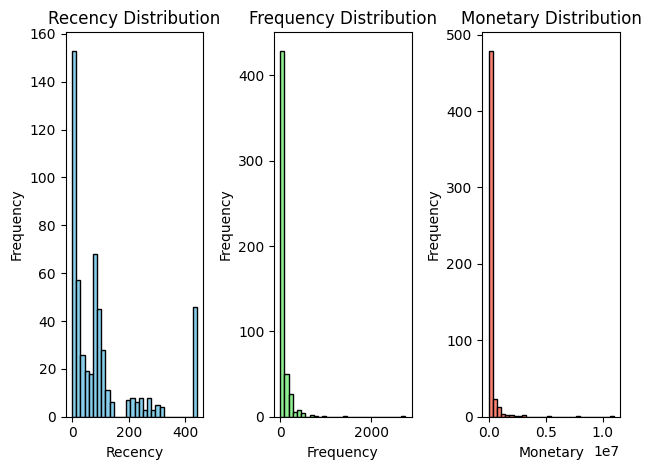

In [ ]:
plt.subplot(1,3,1)
plt.hist(amazon_rfm['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency Distribution')

plt.subplot(1,3,2)
plt.hist(amazon_rfm['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
plt.hist(amazon_rfm['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

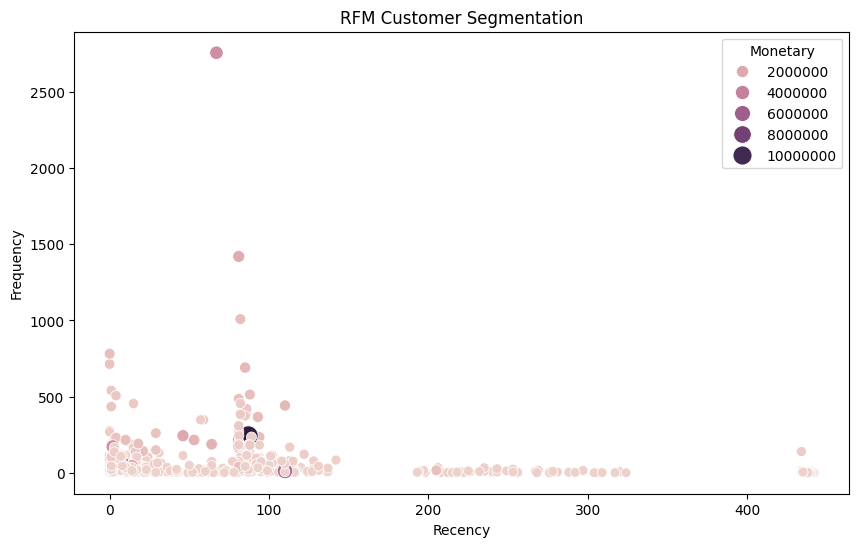

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Recency', y='Frequency', hue='Monetary', data=amazon_rfm, size='Monetary', sizes=(50,200))
plt.title('RFM Customer Segmentation')
plt.show()

- 데이터 스케일링

In [ ]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, PowerTransformer

In [ ]:
rb = RobustScaler()
mm = MinMaxScaler()
amazon_rfm_rb = pd.DataFrame(rb.fit_transform(amazon_rfm), columns=amazon_rfm.columns)
amazon_scaled = pd.DataFrame(mm.fit_transform(amazon_rfm_rb), columns=amazon_rfm.columns)

In [ ]:
amazon_scaled

,Custkey,Recency,Frequency,Monetary
0,0.000000,0.993213,0.003266,0.000750
1,0.000074,0.309955,0.006531,0.002027
2,0.000111,0.242081,0.007983,0.009570
3,0.000147,0.248869,0.000726,0.001286
4,0.000184,0.033937,0.001089,0.000437
...,...,...,...,...
524,0.992554,0.015837,0.038824,0.006465
525,0.999152,0.192308,0.014877,0.004409
526,0.999595,0.002262,0.015965,0.004209
527,0.999705,0.033937,0.001451,0.000305


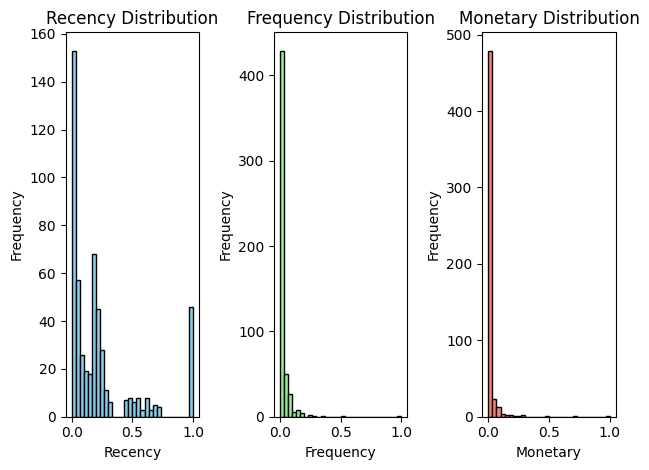

In [ ]:
plt.subplot(1,3,1)
plt.hist(amazon_scaled['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency Distribution')

plt.subplot(1,3,2)
plt.hist(amazon_scaled['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
plt.hist(amazon_scaled['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

-BoxCox 변환 후 MinMaxSclaer 사용

In [ ]:
amazon_rfm_nu = amazon_rfm[['Recency', 'Frequency', 'Monetary']]

In [ ]:
bc = PowerTransformer(method='yeo-johnson')
amazon_rfm_bc = pd.DataFrame(bc.fit_transform(amazon_rfm_nu), columns=amazon_rfm_nu.columns)
amazon_scaled_2 = pd.DataFrame(mm.fit_transform(amazon_rfm_bc), columns=amazon_rfm_bc.columns)

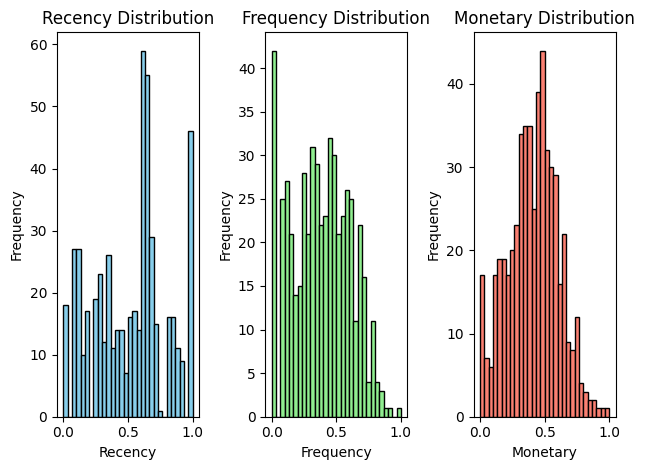

In [ ]:
plt.subplot(1,3,1)
plt.hist(amazon_scaled_2['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency Distribution')

plt.subplot(1,3,2)
plt.hist(amazon_scaled_2['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
plt.hist(amazon_scaled_2['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

#### K-Means 클러스터링

In [ ]:
#!pip install yellowbrick

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-p

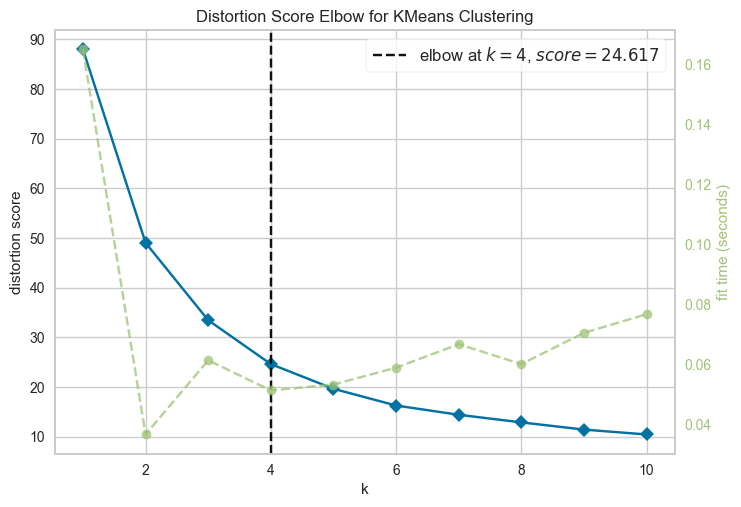

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans(random_state=42)
elbow = KElbowVisualizer(kmeans, k=(1,11))
elbow.fit(amazon_scaled_2)
elbow.show()

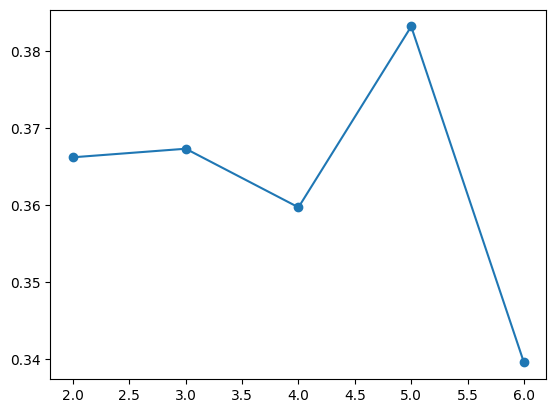

In [ ]:
silhouette_scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(cust_rfm[features])
    score = silhouette_score(cust_rfm[features], kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 7), silhouette_scores, marker='o')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

features= ['Recency_box', 'Frequency_box', 'Monetary_box']

kmeans= KMeans(n_clusters= 5,init='k-means++', random_state= 42)
labels= kmeans.fit_predict(cust_rfm[features])
cust_rfm['cluster_label'] = labels

silhouette= silhouette_score(cust_rfm[features], labels)
print(f'실루엣 계수: {round(silhouette, 2)}')

실루엣 계수: 0.38


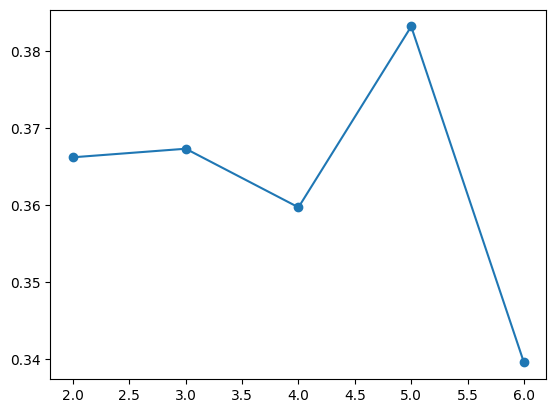

In [ ]:
silhouette_scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(cust_rfm[features])
    score = silhouette_score(cust_rfm[features], kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 7), silhouette_scores, marker='o')

-The KElbowVisualizer also displays the amount of time to train the clustering model per "K" as a dashed green line, but is can be hidden by setting (timings=False). 
-score: SSE(Sum of Square Errors)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


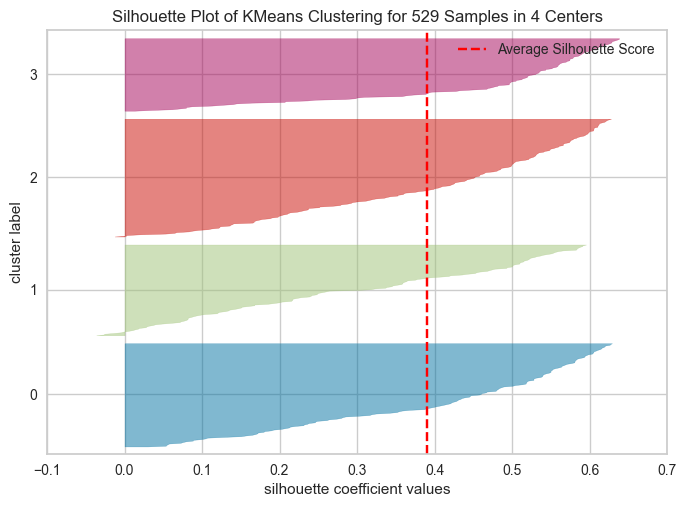

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 529 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
kmeans_4 = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(kmeans_4, colors='yellowbrick')
visualizer.fit(amazon_scaled_2)
visualizer.show()

In [ ]:
k=4
kmeans_4 = KMeans(4, random_state=4)
kmeans_4.fit(amazon_scaled_2)
cluster = kmeans_4.labels_

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
amazon_scaled_2['cluster']=cluster
amazon_kmeans = amazon_scaled_2.copy()
amazon_kmeans

,Recency,Frequency,Monetary,cluster
0,0.998259,0.286594,0.309344,1
1,0.727149,0.378757,0.396282,2
2,0.675965,0.406054,0.538059,2
3,0.681587,0.120950,0.356021,1
4,0.338774,0.158573,0.263799,3
...,...,...,...,...
524,0.239600,0.618823,0.501612,0
525,0.630158,0.490906,0.466437,2
526,0.071238,0.500483,0.462194,0
527,0.338774,0.188850,0.234339,3


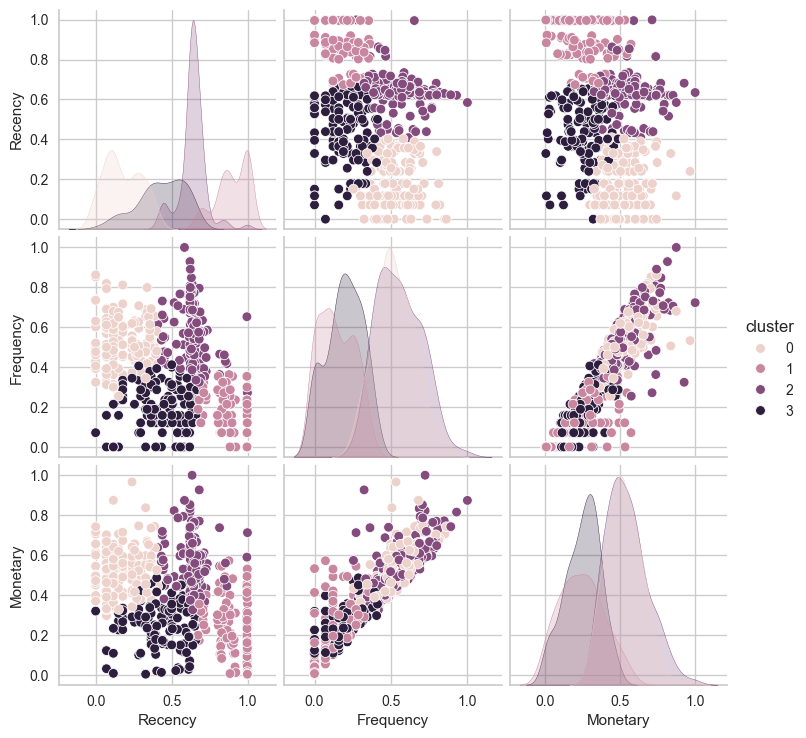

In [ ]:
sns.pairplot(amazon_kmeans, hue='cluster')
plt.show()

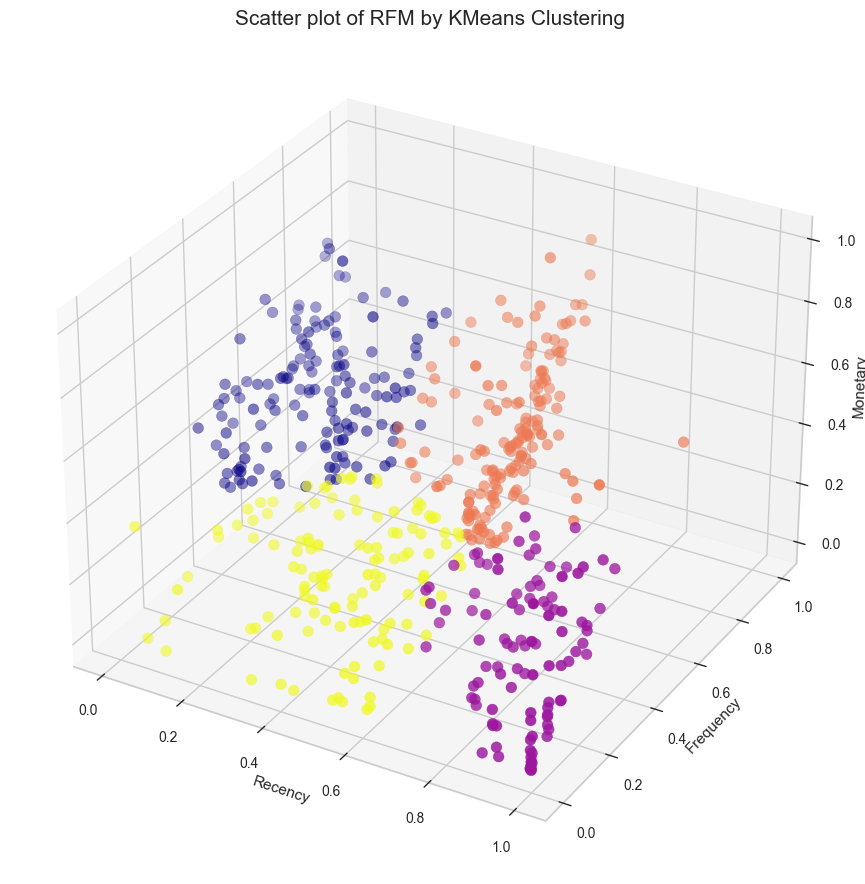

In [ ]:
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(amazon_kmeans['Recency'], amazon_kmeans['Frequency'], amazon_kmeans['Monetary'], c=amazon_kmeans['cluster'], s=60, depthshade= True, cmap='plasma')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Scatter plot of RFM by KMeans Clustering', fontsize = 15)
plt.tight_layout()
plt.show()

#### ANOVA 분산분석(보류)

In [ ]:
amazon_kmeans.groupby('cluster').agg({'Recency':'mean','Frequency':'mean','Monetary':'mean'})

,Recency,Frequency,Monetary
cluster,,,
0,0.178167,0.524075,0.526636
1,0.898466,0.143853,0.241344
2,0.637307,0.552776,0.543014
3,0.431738,0.194783,0.249019


#### Cohort 분석